# Data Analysis and Data Science
## Be curious about the methods

By: Caroline Labelle
<br>For: BCM6065-65

<br>
Date: July 14th 2021

<hr style="border:1px solid black"> </hr>


In [ ]:
Name:Myriam Iliana Ibanez Rios 

## Installing Python libraries

Befor using (or importing) a library in Python, you first need to install it!. This step only need to be done once for each library: once istalled, you will have access to all the libraries from your coding environment.

Ressource: https://pip.pypa.io/en/stable/user_guide/

In [3]:
### Installing scikit-learn
!pip3 install -U scikit-learn

Requirement already up-to-date: scikit-learn in ./.local/lib/python3.6/site-packages (0.24.2)
You are using pip version 18.1, however version 21.1.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
### Import sklearn
import sklearn.decomposition
import sklearn.cluster
### Import scipy
import scipy

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")

We will be mainly using the <code>sklearn</code> and <code>scipy</code> libraries to implement and use various data analysis methods.

scikit-learn ressource: https://scikit-learn.org/stable/index.html
Scipy ressource: https://docs.scipy.org/doc/scipy/reference/

## Data Analysis

Once we've explored our dataset and have a better undesrtanding of what it contains, we can start to analyse it! Before applying any kind of methods, we must first establish "what we want to know".

Do we want to **fit** our data to a model and/or assess if there is a **correlation** between variables? Do we want to **decompose** our dataset and/or identify **clusters**?

Once we establish "what we want to know", we need to define "how we'll do it"! There exist different methods for a single task... We must be curious about the methods and use the one that is the most appropriate to our *context*! 

<hr>

## Regression and Curve fitting

### Linear regression with Scipy

<code>scipy.stats.linregress(x, y, alternative='two-sided')</code>

* **x, y**: sets of measurements
* **alternative='two-sided'**: the alternative hypothesis ($H_{a}$) is that the slope of the regression line is nonzero

Here, the null hypothesis ($H_{0}$) is that the slope is zero.

Ressource: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress

In [3]:
### Import the iris dataset
fn = "iris.tsv"
data_iris = pd.read_csv(fn, sep= "\t")
data_iris

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


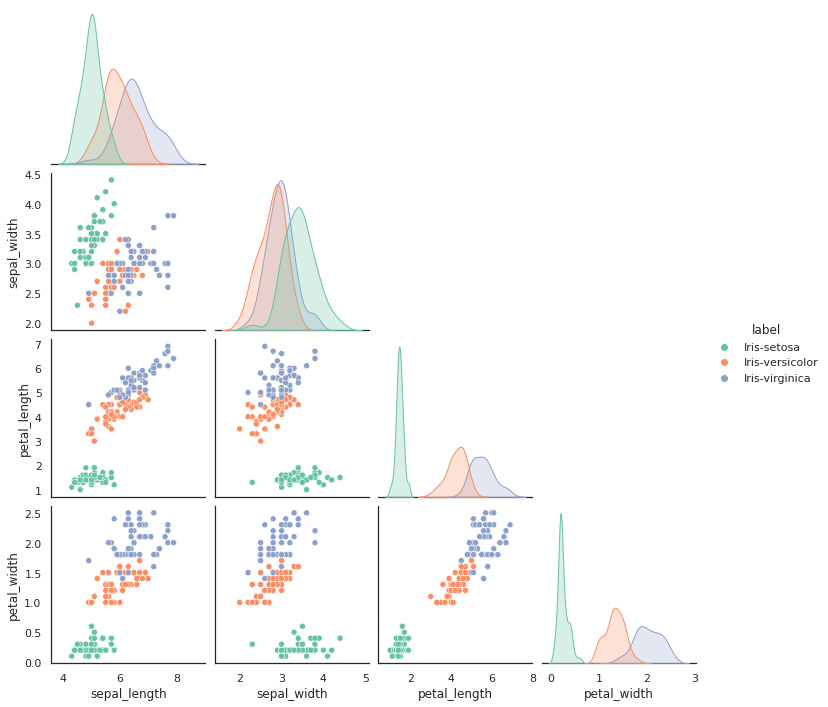

In [4]:
### Plot a pairwise comparison figure with seaborn
sns.pairplot(data_iris, hue="label", corner = True)

Petal length and width seems to be highly corrolated. We want to confirm this by applying a linear regression.

In [5]:
## Do a linear regression
x = data_iris.petal_width
y = data_iris.petal_length

reg = scipy.stats.linregress(x=x, y=y)

In [6]:
## Look a the results
reg

LinregressResult(slope=2.229940495121863, intercept=1.083558032850512, rvalue=0.9628654314027962, pvalue=4.675003907326566e-86, stderr=0.05139623146514124)

In [7]:
y_own = reg.slope * x + reg.intercept

Text(0.5, 1.0, 'Petal width vs length (0.96)')

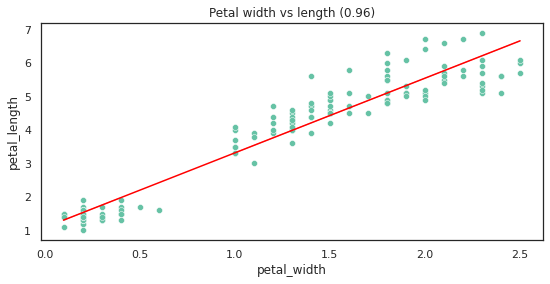

In [8]:
# plot the data
sns.scatterplot(data=data_iris, x=x, y=y)
sns.lineplot(x=x,y=y_own, color="red")
plt.title("Petal width vs length (%.2f)" % (reg.rvalue))


In [9]:
#  %s" is a string
#  %f" is a float, you can also add how many decimal values you can add. (%.3f)%


The <code>rvalue</code> represents the correlation coefficient. The Pearson's correlation coefficient measures the linear relationship between two variables.

**Important**: a correlation of 0 does not imply no correlation!

<hr>

### Exercice [10 points]
Select a pair of variables (other than petal length vs. width). 
1. Apply a linear regression for each flower type;
2. Plot the datapoints and a the linear fit obtained for each flower type (you plot three plots independently).

Which flower type has the highest correlation?

In [10]:
Iris_setosa = data_iris[data_iris["label"]=="Iris-setosa"]
Iris_virginica =  data_iris[data_iris["label"]=="Iris-virginica"]
Iris_versicolor =  data_iris[data_iris["label"]=="Iris-versicolor"]

In [11]:
data=[Iris_setosa,Iris_virginica, Iris_versicolor]


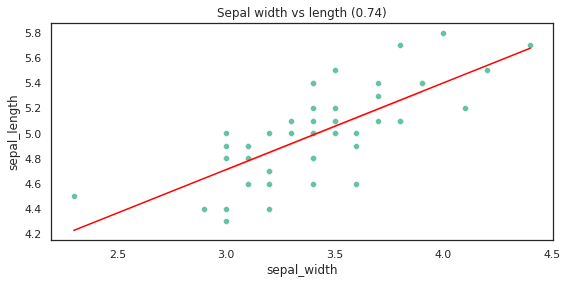

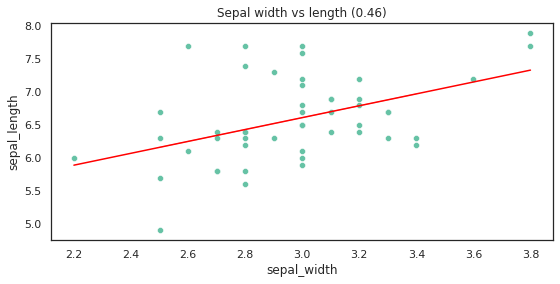

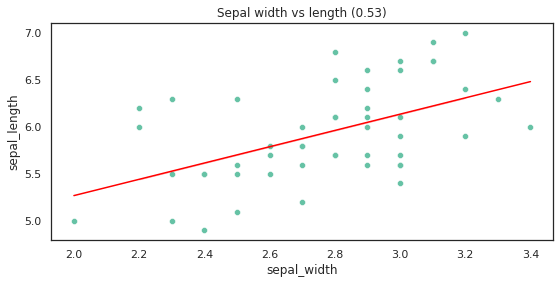

In [12]:
for i in data:
    x = i.sepal_width
    y = i.sepal_length
    reg = scipy.stats.linregress(x=x, y=y)
    y_own = reg.slope * x + reg.intercept
    sns.scatterplot(x=x, y=y)
    sns.lineplot(x=x,y=y_own, color="red")
    plt.title("Sepal width vs length (%.2f)" % (reg.rvalue))
    plt.show()

In [13]:
# Iris setosa has the highest correlation between sepal length and sepal width = 0.74.

### Curve fitting with Scipy

<code>scipy.optimize.curve_fit(f, x, y)</code>

* **f**: model function such that $f(x, ...)$
* **x, y**: sets of measurements


Ressource: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit

In [16]:
def f_linear(x,A,B):
    y=A*x+B
    return y

In [17]:
### Do linear curve fitting of petal length vs. petal width
x_iris= data_iris.petal_width
y_iris=data_iris.petal_length

# assign a variable to each part of the list
param, cov=scipy.optimize.curve_fit(f_linear, x_iris, y_iris)

In [18]:
### Look at results and compare to linregress results
### Param:
param

### R Coef:
np.corrcoef(x_iris,y_iris)

array([[1.        , 0.96286543],
       [0.96286543, 1.        ]])

<code>numpy.corrcoef()</code> returns the Peasron correlation coefficient matrix of the variables.

Ressource: https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html

### Exercice [20 points]
Import the dose-response dataset. We tested various concentrations for 12 different drugs on AML3 cells. The dataset contains the viability responses. 

* Row names are the $log_{10}$ concentration
* Column names are the various drugs we tested
* Cells values are the $\%$ viability of AML3 for a given concentration of a given compound.


**Find which drug has the smallest IC$_{50}$ and which drug has the smallest minimal viabiality.**

It is common practice to model dose-response data with the log-logistic model:<br>
$$f(x) = Min + \frac{Max - Min}{1 + 10 ^ {slope \cdot (x - IC_{50})}} $$<br>

where $x$ is a dose and $f(x)$ the $\%$ viability for that given dose.

In [19]:
fn1 = "dose_response.tsv"
data_dose = pd.read_csv(fn1, sep= "\t")
data_dose.head()

,Unnamed: 0,17-AAG,5-FU,Cisplatin,Docetaxel,Erlotinib,Gemcitabine,Methotrexate,Paclitaxel,Dasatinib,Erastin,MI-2,Ibrutinib
0,0.00,105.365642,104.596167,101.129574,104.611240,100.827837,97.771030,99.892151,103.443733,98.183534,109.187630,93.403644,105.657292
1,0.45,101.565216,101.134757,112.224370,92.524450,98.901574,95.908113,92.199586,98.159898,96.205833,103.643503,94.823219,94.071434
2,0.90,100.033307,105.314506,97.311008,100.129630,111.514098,94.009943,92.336612,90.819773,102.504385,99.907917,89.138794,98.583086
3,1.35,103.455431,93.823001,102.715153,80.514468,104.753194,89.887212,95.716763,94.277135,92.090233,95.876338,81.162379,109.049417
4,1.80,93.130203,94.981719,94.863502,94.301608,98.597278,79.484431,92.782509,94.042318,90.970364,87.460870,71.377037,97.239645


In [20]:
# define model
def linear_model(x,Max,Min,IC50,slope):
    y=(Min + (Max - Min)/ (1 + np.power(10, slope * (x-IC50))))
    return y
 

In [21]:

x_dose= data_dose["Unnamed: 0"]
y_dose=data_dose["17-AAG"]

param, cov=scipy.optimize.curve_fit(linear_model, x_dose, y_dose)
param

array([103.38382006,   7.89763897,   3.28339628,   0.94200152])

In [22]:
Parameters = []

for i in range(1,13):
    x_dose = data_dose["Unnamed: 0"]
    y_dose = data_dose.iloc[:,i]
    param, cov=scipy.optimize.curve_fit(linear_model, x_dose, y_dose)
    Parameters += [param]
    

In [23]:
Parameters = pd.DataFrame(Parameters)
Parameters

,0,1,2,3
0,103.383820,7.897639,3.283396,0.942002
1,105.612452,14.881556,2.627665,0.754362
2,105.480641,14.359447,3.004843,0.776369
3,98.543065,15.167574,2.758754,0.833110
4,103.517922,4.798720,3.161970,0.999003
5,97.150868,22.350109,2.216720,1.138172
6,96.387569,17.145626,2.701177,1.110186
7,100.317178,19.951533,2.708668,0.792859
8,97.493439,15.125262,2.751507,1.151056
9,103.755202,22.114175,2.325097,1.283061


In [24]:
print(min(Parameters.iloc[:,2]))
print("The smallest IC50 belongs to MI-2")

1.9565847209034246
The smallest IC50 belongs to MI-2


In [25]:
print(min(Parameters.iloc[:,1]))
print("The smallest minimal viabiality belongs to Erlotinib")

4.798719917227767
The smallest minimal viabiality belongs to Erlotinib


### BONUS [5 points]
**Is there a linear correlation between the IC50 and Min values?**

Text(0, 0.5, 'Minimal Viability')

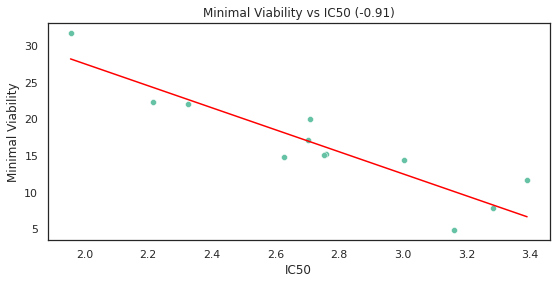

In [26]:
## Do a linear regression
x = Parameters.iloc[:,2]
y = Parameters.iloc[:,1]

reg = scipy.stats.linregress(x=x, y=y)

y_own = reg.slope * x + reg.intercept
# plot the data
sns.scatterplot(data=data_dose, x=x, y=y)
sns.lineplot(x=x,y=y_own, color="red")
plt.title("Minimal Viability vs IC50 (%.2f)" % (reg.rvalue))
plt.xlabel("IC50")
plt.ylabel("Minimal Viability")



Apparently, there is an inverse linear correlation between IC50 and Minimal Viability

<hr>

## Dimensionality reduction

Dimensionality reduction allows use to reduce th enumber of random variables to consider. It is primarly useful for visualisation purpose and to increase the efficiency of other analysis methods (eg. clustering).

### PCA with scikit learn

**PCA** = Principal Component Analysis

PCA is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. *We are trading a little bit of accuracy for simplicity*.

Ressource: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

In [27]:
### Show the iris dataset
data_iris

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [28]:
### Define the data we need for the PCA
X = data_iris.iloc[:,0:4]

In [29]:
### Initiate de PCA and apply it to our data
pca = sklearn.decomposition.PCA()
pca.fit(X)

PCA()

Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components.

**Attributes of the pca object:**

<code>pca.n_components_</code>: estimated number of components

<code>pca.n_features_</code>: number of features in the training data

<code>pca.n_samples_</code>: number of samples in the training data

In [30]:
## Get estimated number of components
pca.n_components_

4

In [31]:
## Get number of features in the training data


In [32]:
## Get number of samples in the training data


PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on.

<code>pca.explained_variance_</code>: amount of variance explained by each of the selected components

<code>pca.explained_variance_ratio_</code>: Percentage of variance explained by each of the selected components.

In [33]:
## Get the explained_variance
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [34]:
np.arange(1,10, 0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

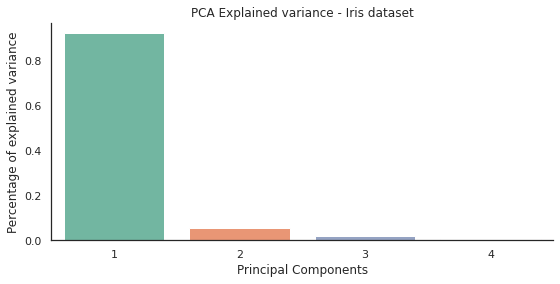

In [35]:
## Plot the explained_variance_ratio_
## Bar plot: https://seaborn.pydata.org/generated/seaborn.barplot.html
pca.n_components_
sns.barplot(x=np.arange(1,5), y=pca.explained_variance_ratio_)
plt.title("PCA Explained variance - Iris dataset")
plt.xlabel("Principal Components")
plt.ylabel("Percentage of explained variance")
sns.despine()

In [36]:
### Apply the dimensionality reduction to our data
reduce_iris = pca.transform(X)
reduce_iris
### Make a dataframe and add the label column
reduce_iris = pd.DataFrame(reduce_iris)
reduce_iris["label"]=data_iris.label

<AxesSubplot:xlabel='0', ylabel='1'>

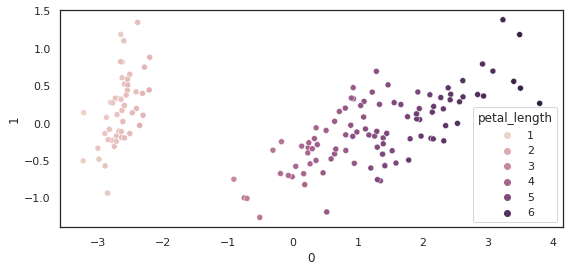

In [37]:
reduce_iris["petal_length"]=data_iris.petal_length
sns.scatterplot(data= reduce_iris, x=0, y=1, hue="petal_length")

<AxesSubplot:xlabel='0', ylabel='1'>

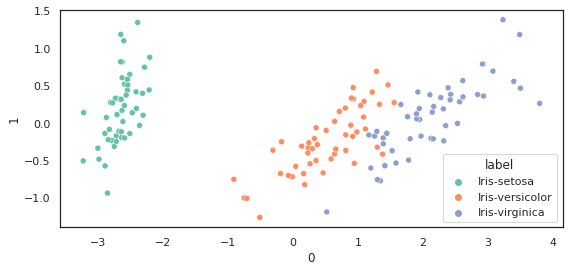

In [38]:
### Plot the results of the reduction
### How many PC should we use?
sns.scatterplot(data= reduce_iris, x=0, y=1, hue="label")

What can be said of the above plot?

Remember, the principal components are less interpretable and don’t have any real meaning since they are constructed as linear combinations of the initial variables...

### Other ressources to learn more about PCA
* https://builtin.com/data-science/step-step-explanation-principal-component-analysis
* https://www.youtube.com/watch?v=HMOI_lkzW08
* https://www.youtube.com/watch?v=FgakZw6K1QQ

### Exercice  [20 points]

Import the Wisconsin breast cancer dataset. We are interested in identifying tumors types.

Can you identify a pair of variables that seems to be linearly correlated? 
* **What is the r coefficient?** 
* **Do you find different r coefficient for the different tumors type?**

Apply a PCA on the dataset. Make sur to plot the percent of explained variance, and the results of the reduction apply to data.
* **What can you conclude regarding the tumors types?**

In [5]:
fn2 = "wisconsin_breast_caner.tsv"
data_breast = pd.read_csv(fn2, sep= "\t")
data_breast.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,Tumors type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,malignant


Text(0, 0.5, 'Mean Parameter')

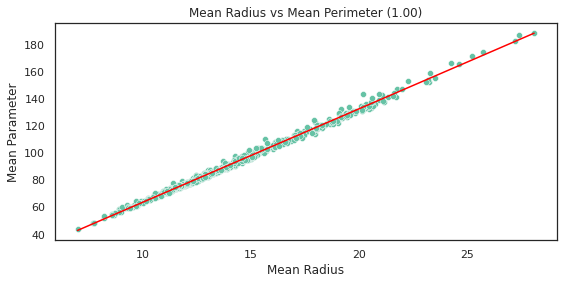

In [6]:
## Do a linear regression
x = data_breast.iloc[:,0]
y = data_breast.iloc[:,2]

reg = scipy.stats.linregress(x=x, y=y)

y_own = reg.slope * x + reg.intercept
# plot the data
sns.scatterplot(data=data_breast, x=x, y=y)
sns.lineplot(x=x,y=y_own, color="red")
plt.title("Mean Radius vs Mean Perimeter (%.2f)" % (reg.rvalue))
plt.xlabel("Mean Radius")
plt.ylabel("Mean Parameter")


In [7]:
reg.rvalue

0.9978552814938111

There is a perfect linear correlation between Mean Radius and Mean Perimeter

In [8]:
data_breast["Tumors type"].unique()

array(['malignant', 'benign'], dtype=object)

In [9]:
Malignant = data_breast[data_breast["Tumors type"]=="malignant"]
Benign = data_breast[data_breast["Tumors type"]=="benign"]

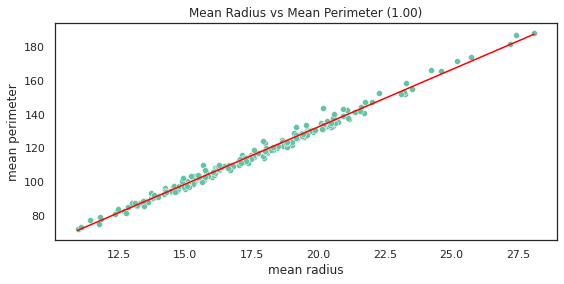

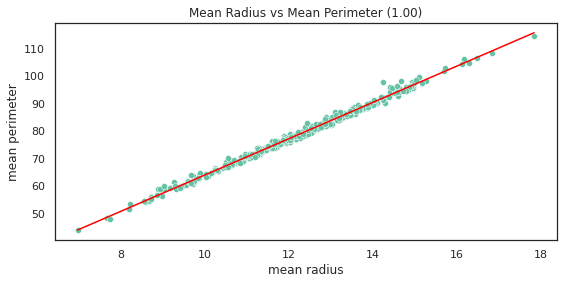

In [10]:
data = [Malignant, Benign]
for i in data:
    x = i["mean radius"]
    y = i["mean perimeter"]
    reg = scipy.stats.linregress(x=x, y=y)
    y_own = reg.slope * x + reg.intercept
    sns.scatterplot(x=x, y=y)
    sns.lineplot(x=x,y=y_own, color="red")
    plt.title("Mean Radius vs Mean Perimeter (%.2f)" % (reg.rvalue))
    plt.show()

No, I didn't find any difference between the 2 types of tumors

In [11]:
X = data_breast.iloc[:,0:10]
pca = sklearn.decomposition.PCA()
pca.fit(X)

PCA()

In [12]:
pca.n_components_


10

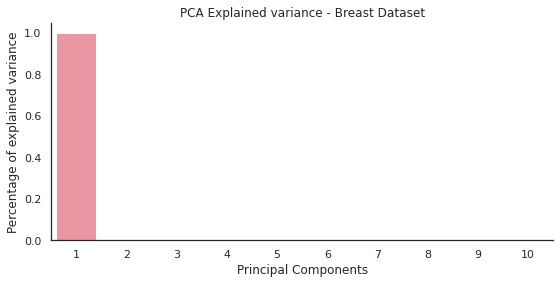

In [13]:
sns.barplot(x=np.arange(1,11), y=pca.explained_variance_ratio_)
plt.title("PCA Explained variance - Breast Dataset")
plt.xlabel("Principal Components")
plt.ylabel("Percentage of explained variance")
sns.despine()

In [14]:
reduce_breast = pca.transform(X)
reduce_breast
### Make a dataframe and add the label column
reduce_breast = pd.DataFrame(reduce_breast)
reduce_breast["Tumors type"]=data_breast["Tumors type"]
reduce_breast

,0,1,2,3,4,5,6,7,8,9,Tumors type
0,347.389726,3.450288,-12.076318,0.572098,0.032811,0.004913,0.007703,0.012064,0.013334,0.000154,malignant
1,672.360671,6.224454,1.098863,-0.416321,0.018808,0.023959,0.004654,0.012693,0.001331,0.005677,malignant
2,549.459902,-0.291601,-0.666707,-0.040560,0.047130,0.013785,0.008920,-0.011776,0.011583,-0.001717,malignant
3,-269.152753,-4.105000,-1.669007,0.598816,0.096022,0.037024,0.052045,0.015608,0.003036,0.004198,malignant
4,643.562714,6.209533,-4.199133,0.134655,-0.023151,-0.020709,-0.023839,-0.008362,-0.004567,0.001980,malignant
...,...,...,...,...,...,...,...,...,...,...,...
564,825.644625,3.957978,4.694108,-0.061644,0.067312,-0.030495,-0.006287,-0.028166,0.001199,0.000728,malignant
565,607.435813,-3.842099,5.717575,-0.305084,0.033193,0.003257,0.007683,-0.010346,0.002635,0.001456,malignant
566,203.898286,-7.801763,3.056188,-0.186346,-0.020818,-0.011886,0.002101,0.003580,-0.000068,-0.000239,malignant
567,612.040133,-10.066262,-0.301608,0.406645,0.053189,0.000613,0.001146,0.013286,-0.002575,-0.004007,malignant


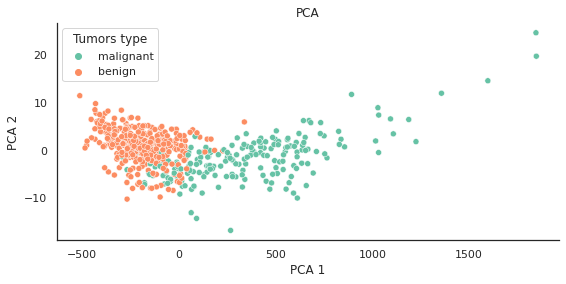

In [15]:
sns.scatterplot(data= reduce_breast, x=0, y=1, hue="Tumors type")
plt.title("PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
sns.despine()

First is difficult to say something as we are only showing PCA data (just for visualization) and there's an important overlap between both types of tumors.

<hr>

## Clustering

Clustering methodologies allow us to automatically group similar object into sets. There exist many clustering methodologies!

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

### k-means with scikit-learn

The KMeans algorithm clusters data by trying to separate samples in $n$ groups of equal variance, minimizing a criterion known as **within-cluster sum-of-squares**.

This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

At a glance, the k-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean $\mu_{j}$ of the samples in the cluster $C_{j}$. 

*In very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.*

Ressource: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

Let's apply the k-means algorithm to the first two principal component of the Iris dataset. **Are we able to cluster the datapoint based on their flower type?**

In [50]:
reduce_iris

,0,1,2,3,label,petal_length
0,-2.684126,0.319397,-0.027915,-0.002262,Iris-setosa,1.4
1,-2.714142,-0.177001,-0.210464,-0.099027,Iris-setosa,1.4
2,-2.888991,-0.144949,0.017900,-0.019968,Iris-setosa,1.3
3,-2.745343,-0.318299,0.031559,0.075576,Iris-setosa,1.5
4,-2.728717,0.326755,0.090079,0.061259,Iris-setosa,1.4
...,...,...,...,...,...,...
145,1.944110,0.187532,0.177825,-0.426196,Iris-virginica,5.2
146,1.527167,-0.375317,-0.121898,-0.254367,Iris-virginica,5.0
147,1.764346,0.078859,0.130482,-0.137001,Iris-virginica,5.2
148,1.900942,0.116628,0.723252,-0.044595,Iris-virginica,5.4


In [51]:
### Define the data
X=reduce_iris.iloc[:,0:4]
X

,0,1,2,3
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,-0.426196
146,1.527167,-0.375317,-0.121898,-0.254367
147,1.764346,0.078859,0.130482,-0.137001
148,1.900942,0.116628,0.723252,-0.044595


In [52]:
### Initiate the k-means alogirthm
### How many cluster should we use?
k=3

In [53]:
### Apply kmeans to our data
kmeans = sklearn.cluster.KMeans(k)
kmeans = kmeans.fit(X)

**Attributes of the kmeans object:**

<code>kmeans.cluster_centers_</code>: coordinates of cluster centers

<code>kmeans.labels_</code>: labels of each point

In [54]:
### Get centroids coordinate
kmeans.cluster_centers_

array([[ 6.75662290e-01, -3.15204772e-01, -4.21730223e-02,
         1.10361570e-02],
       [-2.64241546e+00,  1.90885047e-01,  1.35812812e-02,
        -5.44928771e-04],
       [ 2.37446608e+00,  2.63116935e-01,  5.09385084e-02,
        -1.72893500e-02]])

In [55]:
### Get datapoints labels
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [56]:
### Add the cluster column
reduce_iris["cluster"]=kmeans.labels_

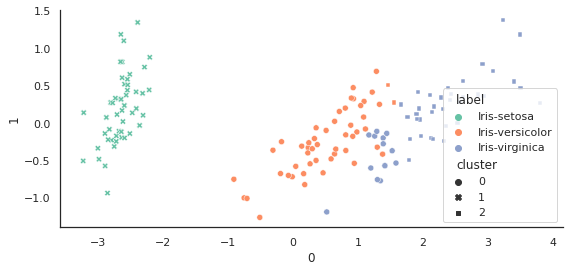

In [57]:
### Plot the cluster and the labels
sns.scatterplot(data=reduce_iris, x=0, y=1, hue="label", style="cluster")
sns.despine()

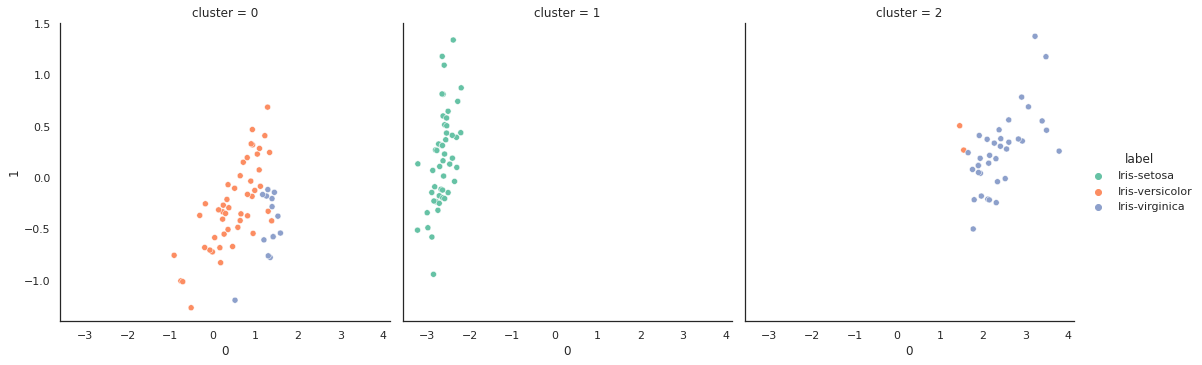

In [58]:
### Plot the cluster and the labels
sns.relplot(data=reduce_iris, x=0, y=1, hue="label", col="cluster")
sns.despine()

It is not always easy to define the number of cluster to use!

The most common approach for deciding the value of $K$ is the so-called elbow method. It involves running the algorithm multiple times over a loop, with an increasing number of cluster choice and then plotting a clustering score as a function of the number of clusters.

<code>inertia_</code>: sum of squared distances of samples to their closest cluster center

In [59]:
### Get the inertia of our initial kmean
kmeans.inertia_

78.85144142614604

In [60]:
### Run kmeans for various k values
### initiate empty list
inertia_list = []

### Create for loop for K from 1 to 10
# variable += variable to add the variable the new value.
for k in range(1,11) :
    kmeans = sklearn.cluster.KMeans(k)
    kmeans = kmeans.fit(X)
    inertia_list += [kmeans.inertia_]

Text(0, 0.5, 'Inertia')

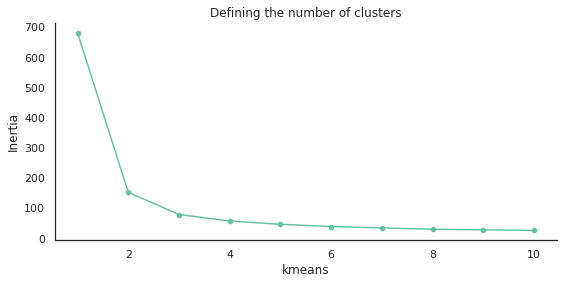

In [61]:
### Plot K vs. interti
sns.scatterplot(x=np.arange(1,11), y=inertia_list)
sns.lineplot(x=np.arange(1,11), y=inertia_list)
sns.despine()
plt.title("Defining the number of clusters")
plt.xlabel("kmeans")
plt.ylabel("Inertia")

### Exercice [10 points]

Go back the Wisconsin breast cancer dataset. **Can you cluster the datapoint in $K$ clusters?**

You must first decide which value to give $K$. Make sure to leave some trace of your tought process...<br>
Apply the kmean algorithme to the data and plot the results. **Can you find a link between one of the dataset features and the clusters?**

In [82]:
X = reduce_breast.iloc[:, 0:10]

In [70]:
###K could be equal to 2 as we have the biological data indicating we have 2 types of tumors, but maybe we can try with plotting
##an elbow plot and try different k, maybe there's an intermediate state between them.

In [ ]:
k= 2

In [63]:

kmeans = sklearn.cluster.KMeans(k)
kmeans = kmeans.fit(X)

In [64]:
kmeans.labels_

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [65]:
reduce_breast["cluster"]=kmeans.labels_

In [66]:
reduce_breast

,0,1,2,3,4,5,6,7,8,9,Tumors type,cluster
0,347.389726,3.450288,-12.076318,0.572098,0.032811,0.004913,0.007703,0.012064,0.013334,0.000154,malignant,1
1,672.360671,6.224454,1.098863,-0.416321,0.018808,0.023959,0.004654,0.012693,0.001331,0.005677,malignant,1
2,549.459902,-0.291601,-0.666707,-0.040560,0.047130,0.013785,0.008920,-0.011776,0.011583,-0.001717,malignant,1
3,-269.152753,-4.105000,-1.669007,0.598816,0.096022,0.037024,0.052045,0.015608,0.003036,0.004198,malignant,0
4,643.562714,6.209533,-4.199133,0.134655,-0.023151,-0.020709,-0.023839,-0.008362,-0.004567,0.001980,malignant,1
...,...,...,...,...,...,...,...,...,...,...,...,...
564,825.644625,3.957978,4.694108,-0.061644,0.067312,-0.030495,-0.006287,-0.028166,0.001199,0.000728,malignant,1
565,607.435813,-3.842099,5.717575,-0.305084,0.033193,0.003257,0.007683,-0.010346,0.002635,0.001456,malignant,1
566,203.898286,-7.801763,3.056188,-0.186346,-0.020818,-0.011886,0.002101,0.003580,-0.000068,-0.000239,malignant,1
567,612.040133,-10.066262,-0.301608,0.406645,0.053189,0.000613,0.001146,0.013286,-0.002575,-0.004007,malignant,1


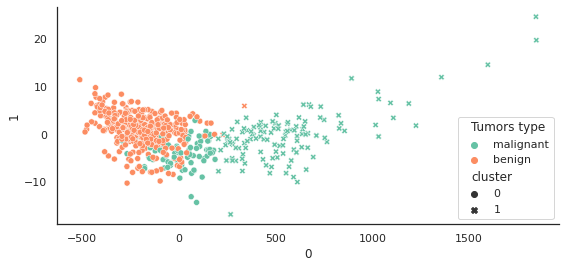

In [67]:
sns.scatterplot(data=reduce_breast, x=0, y=1, hue="Tumors type", style="cluster")
sns.despine()

In [68]:
### Run kmeans for various k values
### initiate empty list
inertia_list = []

### Create for loop for K from 1 to 10
# variable += variable to add the variable the new value.
for k in range(1,11) :
    kmeans = sklearn.cluster.KMeans(k)
    kmeans = kmeans.fit(X)
    inertia_list += [kmeans.inertia_]

Text(0, 0.5, 'Inertia')

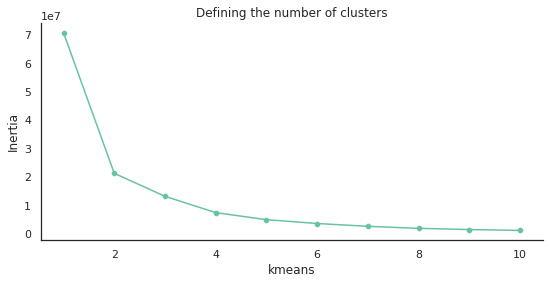

In [288]:
sns.scatterplot(x=np.arange(1,11), y=inertia_list)
sns.lineplot(x=np.arange(1,11), y=inertia_list)
sns.despine()
plt.title("Defining the number of clusters")
plt.xlabel("kmeans")
plt.ylabel("Inertia")

In [16]:
X = reduce_breast.iloc[:, 0:10]

In [17]:
k= 4
kmeans = sklearn.cluster.KMeans(k)
kmeans = kmeans.fit(X)

In [18]:
kmeans.labels_

array([2, 2, 2, 1, 2, 1, 2, 3, 1, 1, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 2, 2, 1, 3, 2, 3, 3, 3, 1, 3, 3, 3, 1, 2, 3,
       3, 2, 1, 3, 1, 3, 1, 3, 1, 2, 3, 1, 2, 3, 1, 1, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 2, 1, 2, 3, 1, 3, 3, 2, 2, 1, 1, 1, 0, 2, 1, 2, 3, 2,
       1, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 3, 1, 1, 1, 1, 3, 3, 2, 1, 2, 0, 3, 3, 3, 3, 2, 3, 2, 1, 3,
       3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1,
       3, 1, 2, 3, 1, 1, 1, 2, 2, 1, 0, 3, 1, 3, 2, 3, 1, 3, 3, 1, 1, 1,
       1, 3, 1, 1, 0, 2, 3, 1, 3, 1, 2, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 2,
       2, 3, 1, 2, 0, 3, 1, 3, 1, 3, 1, 3, 2, 1, 0, 2, 3, 3, 1, 1, 2, 2,
       3, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 1, 1, 2, 1, 3, 0, 2, 3, 2, 3, 1,
       1, 3, 2, 1, 3, 1, 1, 1, 2, 1, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3,
       2, 2, 1, 3, 1, 1, 3, 1, 2, 1, 2, 1, 1, 2, 3, 3, 2, 1, 2, 3, 1, 1,
       1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 2,

In [19]:
reduce_breast["cluster"]=kmeans.labels_

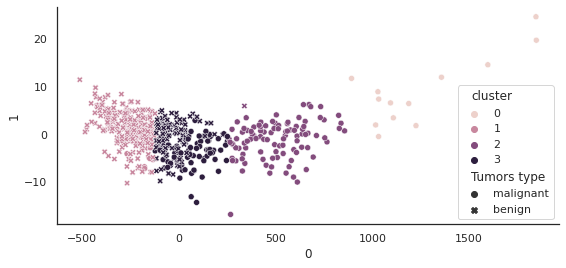

In [20]:
sns.scatterplot(data=reduce_breast, x=0, y=1, hue="cluster", style="Tumors type")
sns.despine()

In [ ]:
#As I mentioned before, maybe there are different grades of benign and malignant tumors. Making more clusters based on 
#the results of the elbow plot, allow us to see the changes from one state to another, where cluster 0 can be equal to 
#benign tumor, 1 to late benign, 2 to early malignant and 4 to malignant.